# 1.3 Linear vs log returns

In [44]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [45]:
ticker = "AAPL"
period = "5y"

price_data = yf.download(ticker, period=period, auto_adjust=False)["Close"]

[*********************100%***********************]  1 of 1 completed


In [46]:
price_data.head()

Ticker,AAPL
Date,
2020-05-04,73.290001
2020-05-05,74.389999
2020-05-06,75.157501
2020-05-07,75.934998
2020-05-08,77.532501


In [59]:
df = pd.DataFrame()
df["ClosePrice"] = price_data

In [60]:
df["PctChange"] = df["ClosePrice"].pct_change()
df["LogChange"] = np.log(df["ClosePrice"]) - np.log(df["ClosePrice"].shift(1))

In [61]:
df = df.dropna()

In [62]:
plot_df = pd.DataFrame()
plot_df["CumulativePctReturns"] = (1+df["PctChange"]).cumprod()
plot_df["CumulativeLogReturns"] = np.exp(df["LogChange"].cumsum())
plot_df.head()

,CumulativePctReturns,CumulativeLogReturns
Date,,
2020-05-05,1.015009,1.015009
2020-05-06,1.025481,1.025481
2020-05-07,1.036089,1.036089
2020-05-08,1.057886,1.057886
2020-05-11,1.074533,1.074533


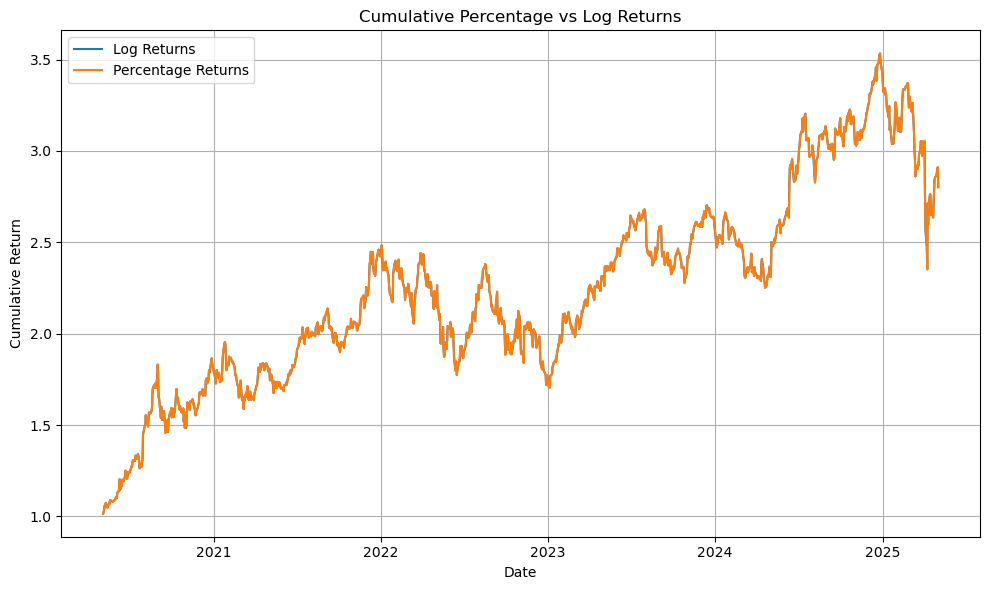

In [63]:
plt.figure(figsize=(10,6))
plt.plot(plot_df["CumulativeLogReturns"], label="Log Returns")
plt.plot(plot_df["CumulativePctReturns"], label="Percentage Returns")
plt.title("Cumulative Percentage vs Log Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion
The difference between log and percentage returns is often very small in stock price movements. 